<div class="alert alert-warning">
<b>Reviewer's comment: </b> Here is some additional links for you:
    <ul>
        <li>Different prioritization frameworks overview: <a>https://uxdesign.cc/how-to-choose-your-product-prioritization-framework-ff0320d63ebf</a></li>
        <li>Advanced ML technics for the anomaly detection: <a>https://medium.com/learningdatascience/anomaly-detection-techniques-in-python-50f650c75aaf</a></li>
        <li>AB testing guide: <a>https://www.shopify.com/blog/the-complete-guide-to-ab-testing</a></li>
        <li>Main parametric and non-parametric tests overview: <a>https://keydifferences.com/difference-between-parametric-and-nonparametric-test.html</a></li>
    </ul>
</div>

---

## <b>Making Business Decisions Based on Data Project Description</b>
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue. You need to prioritize these hypotheses, launch an A/B test, and analyze the results.
### <b>Description of the data</b>
##### <b>Data used in the first part of the project</b>
/datasets/hypotheses_us.csv
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

##### <b>Data used in the second part of the project</b>
/datasets/orders_us.csv
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

##### <b>Project description 2</b>
/datasets/visits_us.csv
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified

##### Make sure to preprocess the data. 
There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

### Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
#### Task:
1. Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
2. Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
3. Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.


### Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Analyze the A/B test by carrying out the following tasks.

#### Task:
Analyze the A/B test:
1. Graph cumulative revenue by group. Make conclusions and conjectures.
<br>

2. Graph cumulative average order size by group. Make conclusions and conjectures.
<br>

3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
<br>

4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
<br>

5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
<br>

6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
<br>

7. Plot a scatter chart of order prices. Make conclusions and conjectures.
<br>

8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
<br>

9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
<br>

10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
<br>

11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
<br>

12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
<br>

13. Make a decision based on the test results. 
-The possible decisions are: 
    1. Stop the test, consider one of the groups the leader. 
    2. Stop the test, conclude that there is no difference between the groups. 
    3. Continue the test.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice introduction! You can improve it with an interactive table of content:<a>https://moonbooks.org/Articles/How-to-create-a-table-of-contents-in-a-jupyter-notebook-/</a>
</div>

In [2]:
#data preprocessing
#import libraries
import pandas as pd
pd.set_option('max_colwidth', 400)
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mth

In [3]:
# read the files
hypotheses = pd.read_csv('https://code.s3.yandex.net//datasets/hypotheses_us.csv', ';')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_us.csv', sep=',')

display(hypotheses)
display(orders.head())
display(visits.head())

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small tip: you can customize the dataframe so that the hypotheses are fully displayed. To do this, use this setting after importing the pandas library: <code>pd.set_option('max_colwidth', 400)</code>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, pay attention to data frames formatting in your project. Don't forget to use head(), tail(), or sample() when displaying large tables. This will allow you to control the size of the final document and prevent browser freezings.
</div>

In [3]:
# look at data types/info 
hypotheses.info()
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [4]:
# checking for null values
hypotheses.isnull().sum()
orders.isnull().sum()
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [5]:
hypotheses.duplicated().sum()

0

In [6]:
hypotheses.drop_duplicates(inplace=True)
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [7]:
orders.duplicated().sum()

0

In [8]:
orders.drop_duplicates(inplace=True)
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
visits.duplicated().sum()

0

In [10]:
visits.drop_duplicates(inplace=True)
display(visits.head())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#removing visitors from both group A and group B
datesgroups = orders[['date', 'group']].drop_duplicates()

#### Conclusion
Not showing duplicates

### Part 1. Prioritizing Hypotheses
1. Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.


In [12]:
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [13]:
hypotheses['ICE'] = hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']

display(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


2. Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [14]:
hypotheses['RICE']= hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Effort']

display(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Task 3. Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.

In [15]:
display(hypotheses.sort_values(by='Reach', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [16]:
display(hypotheses.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


##### Conclusion

ICE values shows the top hypothesis as 8, 0, 7, and 6.
<br>

Top RICE values which hold more insight/weight are 7, 2, 0, 6 showing how many users the hypothesis will affect. 

Both Rice and Ice hypothesis included 0,7,6 and we will have to evaluate what is driving this behavior.


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Good work! You can reinforce this research subpart with ICE/RICE scatter plot. You can find a template here: <a>https://stackoverflow.com/a/57349859/11664121</a>
</div>

### Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Analyze the A/B test by carrying out the following tasks.


### Task 1 : Graph cumulative revenue by group. Make conclusions and conjectures.

,group,revenue
0,A,64554.9
1,B,92840.6


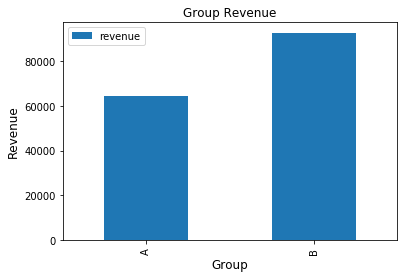

In [17]:
#Revenue by group
order_revenue = orders.drop(['date'], axis=1).groupby('group', as_index=False).agg({'revenue' : 'sum'})
display(order_revenue)

barplot = order_revenue.plot(x='group', kind='bar')
plt.title('Group Revenue')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.show()

In [18]:
ordersAggregated = datesgroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [19]:
visitorsAggregated = datesgroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


<Figure size 720x360 with 0 Axes>

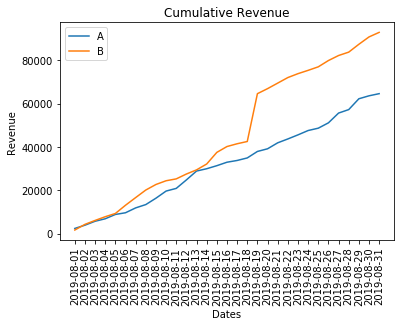

<Figure size 720x360 with 0 Axes>

In [21]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

#plt.grid()
plt.title('Cumulative Revenue')
plt.xlabel('Dates')
plt.ylabel('Revenue')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.figure(figsize=(10, 5))

### Conclusion
You can see Group B has more in Revenue clearly, hypothesis is marketing efforts work better on Group B

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Some general improvement tips:
<ul>
    <li>You can tune figure size with <code>plt.figure(figsize=(10, 5))</code></li>
    <li>You can turn on the grid with <code>plt.grid()</code></li>
    <li>You can hide text above the plot with <code>plt.show()</code></li>
</ul>
</div>

### Task 2 : Graph cumulative average order size by group. Make conclusions and conjectures.

,group,revenue
0,A,115.897487
1,B,145.063437


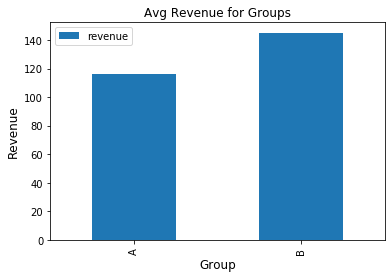

In [22]:
#visits by group
order_avg = orders.drop(['date'], axis=1).groupby('group', as_index=False).agg({'revenue' : 'mean'})
display(order_avg)

barplot = order_avg.plot(x='group', kind='bar')
plt.title('Avg Revenue for Groups')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.show()

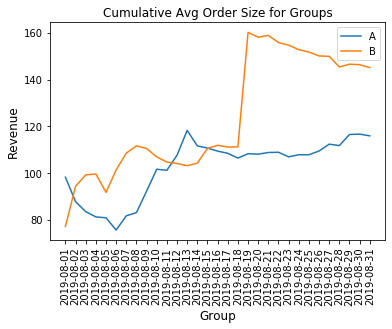

In [23]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative Avg Order Size for Groups')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Group', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.legend() 

### Conclusion
Shows Group A started of higher and then fell and raised again until Group Btook over going forward. Shows Group B made more cumulative avg revenue by 30. The spike is mostly due to one or several large orders

### Task 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.


In [24]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
#display(ordersByUsersA)

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
#display(ordersByUsersB)



18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitorId, dtype: int64

425    1920142716
Name: visitorId, dtype: int64

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorId, dtype: int64


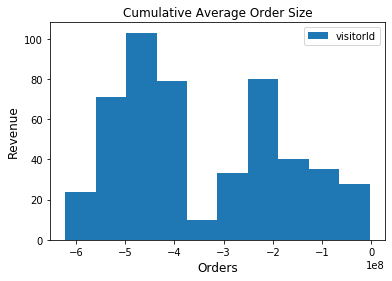

In [25]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
display(usersWithManyOrders)

usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']
display(usersWithExpensiveOrders)

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

Difference = ordersByUsersB - ordersByUsersA
barplot = Difference.plot(x='orders', kind='hist')
plt.title('Cumulative Average Order Size')
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Orders', fontsize=12)

plt.show()

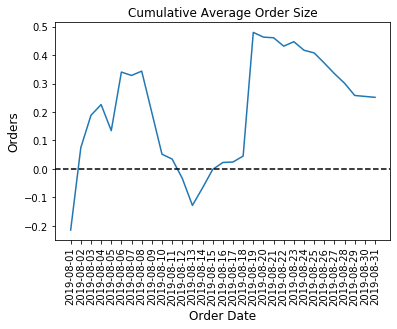

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Cumulative Average Order Size')
plt.ylabel('Orders', fontsize=12)
plt.xlabel('Order Date', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.axhline(y=0, color='black', linestyle='--')

### Conclusion

Shows cumulative avg changes with B orders vs A orders and the fluctuation in orders over time. 

### Task 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [27]:
#finding orders users placed each day
#orders['day']=orders['date'].astype('datetime64[D]')
daily_orders = orders.groupby('date').agg({'revenue': 'sum'}).reset_index()
daily_orders.columns = ['date', 'daily_orders']
display(daily_orders)

conversion_data=visits.merge(daily_orders, on='date')
display(conversion_data)

,date,daily_orders
0,2019-08-01,3976.8
1,2019-08-02,4127.3
2,2019-08-03,3622.0
3,2019-08-04,2863.9
4,2019-08-05,3483.1
5,2019-08-06,4596.2
6,2019-08-07,5774.4
7,2019-08-08,5018.2
8,2019-08-09,5505.2
9,2019-08-10,5008.6


,date,group,visits,daily_orders
0,2019-08-01,A,719,3976.8
1,2019-08-01,B,713,3976.8
2,2019-08-02,A,619,4127.3
3,2019-08-02,B,581,4127.3
4,2019-08-03,A,507,3622.0
...,...,...,...,...
57,2019-08-29,B,531,8619.2
58,2019-08-30,A,490,4757.6
59,2019-08-30,B,490,4757.6
60,2019-08-31,A,699,3095.7


There's a big spike in orders on 2019-08-19

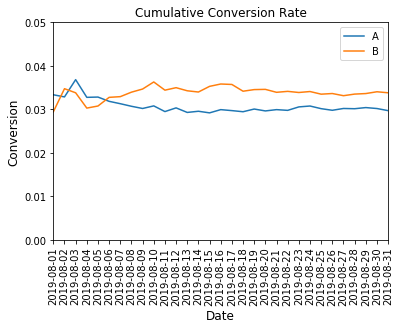

In [28]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative Conversion Rate')
plt.ylabel('Conversion', fontsize=12)
plt.xlabel('Date', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


['2019-08-01', '2019-08-31', -0.5, 0.5]

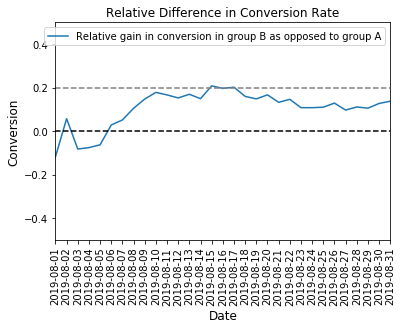

In [29]:
#relative difference in conversion rates
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Relative Difference in Conversion Rate')
plt.ylabel('Conversion', fontsize=12)
plt.xlabel('Date', fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

### Conclusion
Shows A was higher and then B took over and conversion stabilized by the end of the test.

### Conclusion: 
seems as if the conversion ratio is stable showing Group B leading, tendency to grow or stablize around the mean 

### Task 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> You can improve scatter plots below by coloring them in AB group colors:<br><a>https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
</a>
</div>

In [30]:
daily_users = orders.groupby('visitorId').agg({'revenue': 'count'}).reset_index()
daily_users.columns = ['visitorId', 'daily_orders']
display(daily_users.sort_values(by='daily_orders', ascending=False).head(15))


#daily_users1 = orders.groupby('visitorId').agg({'revenue': 'sum'}).reset_index()
#daily_users1.columns = ['visitorId', 'daily_orders1']
#display(daily_users1.sort_values(by='daily_orders1', ascending=False).head(15))
#display(np.percentile(daily_users1['daily_orders1'], [90, 95, 99]))



,visitorId,daily_orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


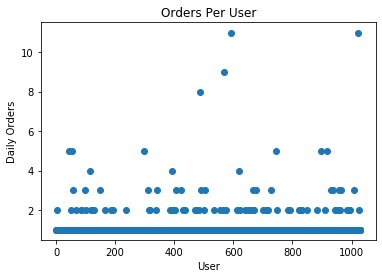

In [31]:
x_values = pd.Series(range(0,len(daily_users)))
plt.scatter(x_values, daily_users['daily_orders'])
plt.title('Orders Per User')
plt.xlabel('User')
plt.ylabel('Daily Orders')
plt.show()

### Conclusion #2
Shows we have a couple outliers and it could be skewing our data.

### Task 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [34]:
display(np.percentile(daily_users['daily_orders'], [90, 95, 99]))


array([1., 2., 4.])

### Conclusion
Abrnomal value would be anything past 4. We see 1% had orders higher than that.

### Task 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

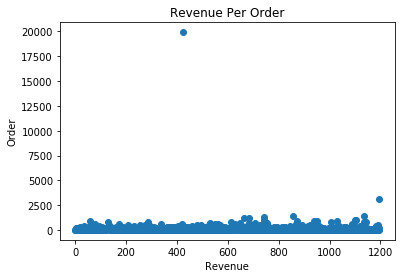

In [35]:
orders.sort_values(by='revenue', ascending=False)

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Revenue Per Order')
plt.xlabel('Revenue')
plt.ylabel('Order')
plt.show()

### Conclusion
We can see the two anomalies very clearly.

### Task 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [36]:
display(np.percentile(orders['revenue'], [90, 95, 99])) 

array([282.48 , 435.54 , 900.904])

### Conclusion
Becomes an anomaly if its greater than 99%, so > than 900.904

### Task 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


In [37]:
import scipy.stats as stats

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
print(sampleA)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
print(sampleB)

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
print(ordersByUsersA)

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
print(ordersByUsersB)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64
      visitorId  orders
0       8300375       1
1      11685486       1
2      54447517       1
3      66685450       1
4      78758296       1
..          ...     ...
498  4243832526       1
499  4256040402       7
500  4259830713       1
501  4266935830       1
502  4278982564       1

[503 rows x 2 columns]
      visitorId  orders
0       5114589       1
1       6958315       1
2       8300375       1
3      39475350       1
4      47206413       1
..          ...     ...
581  4258103007       1
582  4266935830       1
583  4279090005       1
584  4281247801       1
585  4283872382       1

[586 rows x 2 columns]


#### Hypothesis Test
- H0 (the null hypothesis): There's not a statistically significant difference in conversion between Group A and Group B using raw data
- H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B using raw data
- alpha value = .05

In [38]:
print("{0:.2%}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.2%}".format(sampleB.mean()/sampleA.mean()-1)) 

0.84%
13.81%


In [39]:
print("{0:.2%}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.2%}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = .05 #significance level

results = st.mannwhitneyu(sampleA, sampleB)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in conversion between Group A and Group B")

0.84%
13.81%
p-value:  0.008396177528376304
H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B


### Conclusion
p value of .008 which is less than .05. So we reject the null hypothesis because the difference is statistically significant, relative conversion rate is 13.8%

### Task 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


#### Hypothesis Test

- H0 (the null hypothesis): there's not a statistically significant difference in conversion between Group A and Group B using raw data
- H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B using raw data
- alpha value = .05

In [40]:
print("{0:.2%}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group A and Group B")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group A and Group B")


34.58%
25.17%
p-value:  0.3457623386632368
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group A and Group B


### Conclusion
p value of .346 which is higher than the alpha of .05. This means that that there is no reason to reject the null hypothesis and conclude that the average order size differs between the groups. The average order size for group B is slightly lower than group A. Relative difference only 25.2

### Task 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


In [41]:
from scipy import stats as st

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorId']

print(usersWithManyOrders)

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers)
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print("{0:.2%}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitorId, dtype: int64
1099     148427295
18       199603092
23       237748145
37       249864742
68       457167155
68       611059232
744      888512513
1103    1164614297
146     1230306981
1136    1307669133
858     1316129916
189     1614305549
425     1920142716
227     2038680547
1196    2108080724
237     2108163459
269     2378935119
278     2458001652
360     2587333274
382     2742574263
349     2988190573
424     3062433592
501     3717692402
514     3803269165
456     3908431265
467     3967698036
743     4133034833
499     4256040402
662   

#### Hypothesis Test
- H0 (the null hypothesis): there's not a statistically significant difference in conversion between Group A and Group B using filtered data
- H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B using filtered data
- alpha value = .05

In [42]:
alpha = .05 #significance level

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B using filtered data")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in conversion between Group A and Group B using filtered data")



p-value:  0.005076636462035423
H1 (the alternative hypothesis): there is a statistically significant difference in conversion between Group A and Group B using filtered data


### Conclusion
Conversion didn't make much a difference and very little different between the raw and filtered data

### Task 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


In [43]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].sum()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].sum() - 1))


0.419
0.159


#### Hypothesis Testing
- H0 (the null hypothesis): there is statistically significant difference in average order size between Group A and B, so we reject the null hypothesis
- H1 (the alternative hypothesis): Failed to reject the null hypothesis: we can't make conclusions about the difference
- alpha value = .05

In [44]:
alpha = .05 
#significance level

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value:  0.005076636462035423
Null hypothesis rejected: the difference is statistically significant


### Conclusion
We also checked the values for average order size to further evaluate the data. and we see the P value decreased from .346 to .335 and the difference between the segments is .115 instead of .252.

### Task 13. Make a decision based on the test results. 
-The possible decisions are: 
    1. Stop the test, consider one of the groups the leader. 
    2. Stop the test, conclude that there is no difference between the groups. 
    3. Continue the test.

### Final Conclusion
There is no reason to continue the test. Based on all the statistical tests that were run it shows a distinct difference between gorups and that the group B scored higher and is the obvious leader. 